In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [36]:
px

<module 'plotly.express' from 'c:\\Users\\laura\\Projekt\\code\\Project_OS_Australia\\.venv\\Lib\\site-packages\\plotly\\express\\__init__.py'>

Min första version för att ladda ner dataset:
Fungerar bara om alla har samma mapp-struktur.

athletes = pd.read_csv("../data/athlete_events.csv")
region = pd.read_csv("../data/noc_regions.csv")

skillnad med directory_data (Adams version):
Som att tala om att "vi har en mapp som heter 'data' kom ihåg den."

directory_data - funkar även om mappen data är på olika platser. 

Jag valde att merga athletes och regions på NOC dvs den oficiella olympiska landskoden för att båda innehåller den.

how="outer" för att inte i så tidigt skede tappa data. Mitt resonemnag var att innan jag vet vad och hur jag vill sålla datan, vill jag inte tappa något som jag senare behöver.


In [37]:
directory_data = "../data"                                     #för att hålla sökvägen flexibel (Adams version)

athletes = pd.read_csv(f"{directory_data}/athlete_events.csv")
regions = pd.read_csv(f"{directory_data}/noc_regions.csv")

merged = pd.merge(athletes, regions, on="NOC", how="outer")    # merge på NOC (os standard landskod)
                                                               #"outer" för att ha korrekt data med till undersökande fas. 

merged

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,502.0,Ahmad Shah Abouwi,M,NaN,NaN,NaN,Afghanistan,AFG,1956 Summer,1956.0,Summer,Melbourne,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN
1,1076.0,Jammal-ud-Din Affendi,M,28.0,NaN,NaN,Afghanistan,AFG,1936 Summer,1936.0,Summer,Berlin,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN
2,1101.0,Mohammad Anwar Afzal,M,NaN,NaN,NaN,Afghanistan,AFG,1948 Summer,1948.0,Summer,London,Football,Football Men's Football,NaN,Afghanistan,NaN
3,1745.0,Mohammad Aktar,M,17.0,156.0,48.0,Afghanistan,AFG,1980 Summer,1980.0,Summer,Moskva,Wrestling,"Wrestling Men's Light-Flyweight, Freestyle",NaN,Afghanistan,NaN
4,4628.0,Mohammad Daoud Anwary,M,22.0,NaN,NaN,Afghanistan,AFG,1964 Summer,1964.0,Summer,Tokyo,Wrestling,"Wrestling Men's Bantamweight, Freestyle",NaN,Afghanistan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271112,130832.0,Hillary Wilson,F,15.0,157.0,65.0,Zimbabwe,ZIM,1960 Summer,1960.0,Summer,Roma,Swimming,Swimming Women's 100 metres Butterfly,NaN,Zimbabwe,NaN
271113,130832.0,Hillary Wilson,F,15.0,157.0,65.0,Zimbabwe,ZIM,1960 Summer,1960.0,Summer,Roma,Swimming,Swimming Women's 4 x 100 metres Medley Relay,NaN,Zimbabwe,NaN
271114,130880.0,Peter Arthur Wilson,M,20.0,185.0,80.0,Zimbabwe,ZIM,1980 Summer,1980.0,Summer,Moskva,Sailing,Sailing Mixed One Person Dinghy,NaN,Zimbabwe,NaN
271115,131478.0,"Jennifer ""Jenny"" Wood",F,16.0,172.0,64.0,Zimbabwe,ZIM,1964 Summer,1964.0,Summer,Tokyo,Swimming,Swimming Women's 100 metres Butterfly,NaN,Zimbabwe,NaN


letar underdog statsistik:

In [38]:
goldmedal_by_country=merged[merged["Medal"]=="Gold"].groupby(["NOC", "region", "Sport"]).size().reset_index(name="gold_count")

underdogs = goldmedal_by_country[
    (goldmedal_by_country["gold_count"] <= 3)

].sort_values("gold_count").head(10)

underdogs

,NOC,region,Sport,gold_count
1,ALG,Algeria,Boxing,1
907,YUG,Serbia,Swimming,1
898,VIE,Vietnam,Shooting,1
10,ARG,Argentina,Judo,1
39,AUS,Australia,Weightlifting,1
42,AUT,Austria,Athletics,1
45,AUT,Austria,Cross Country Skiing,1
46,AUT,Austria,Cycling,1
47,AUT,Austria,Equestrianism,1
816,URS,Russia,Archery,1


In [39]:
winter_gold = merged[(merged["Season"] == "Winter") & (merged["Medal"] == "Gold")].groupby(["NOC", "Sport"]).size().reset_index(name="gold_count")

winter_underdogs = winter_gold[
    (winter_gold["gold_count"]<= 3)
].sort_values("gold_count").head(10)

winter_underdogs

underdog_details = merged[(merged["Season"] == "Winter") & (merged["Medal"] == "Gold")
].merge(winter_underdogs[["NOC", "Sport"]], on=["NOC", "Sport"]).head(20)

underdog_details

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,14492.0,Steven John Bradbury,M,28.0,178.0,80.0,Australia,AUS,2002 Winter,2002.0,Winter,Salt Lake City,Short Track Speed Skating,"Short Track Speed Skating Men's 1,000 metres",Gold,Australia,NaN
1,15096.0,Torah Jane Bright (-Thomson),F,23.0,161.0,57.0,Australia,AUS,2010 Winter,2010.0,Winter,Vancouver,Snowboarding,Snowboarding Women's Halfpipe,Gold,Australia,NaN
2,35388.0,George Ingle Finch,M,35.0,NaN,NaN,Australia,AUS,1924 Winter,1924.0,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold,Australia,NaN
3,30509.0,Julia Dujmovits,F,26.0,168.0,60.0,Austria,AUT,2014 Winter,2014.0,Winter,Sochi,Snowboarding,Snowboarding Women's Parallel Slalom,Gold,Austria,NaN
4,49130.0,Christian Hoffmann,M,27.0,170.0,62.0,Austria,AUT,2002 Winter,2002.0,Winter,Salt Lake City,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,Gold,Austria,NaN
5,85274.0,Emese Nemeth-Hunyady (-Jrvinen),F,27.0,167.0,65.0,Austria,AUT,1994 Winter,1994.0,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,500 metres",Gold,Austria,NaN
6,24808.0,Ekaterina Stefanova Dafovska (-Prodanova),F,22.0,163.0,54.0,Bulgaria,BUL,1998 Winter,1998.0,Winter,Nagano,Biathlon,Biathlon Women's 15 kilometres,Gold,Bulgaria,NaN
7,45491.0,Han Xiaopeng,M,22.0,173.0,75.0,China,CHN,2006 Winter,2006.0,Winter,Torino,Freestyle Skiing,Freestyle Skiing Men's Aerials,Gold,China,NaN
8,65947.0,Janne Petteri Lahtela,M,27.0,171.0,72.0,Finland,FIN,2002 Winter,2002.0,Winter,Salt Lake City,Freestyle Skiing,Freestyle Skiing Men's Moguls,Gold,Finland,NaN
9,4321.0,Peter Angerer,M,24.0,178.0,73.0,West Germany,FRG,1984 Winter,1984.0,Winter,Sarajevo,Biathlon,Biathlon Men's 20 kilometres,Gold,Germany,NaN


Upptäckt:
Australien har tävlat både som Australien men även som Australasia med Nya Zealand. nedan finns de atlelter som var från Nya zeland namngivna:

1908 and 1912 – Australasians together
Due to the high cost of overseas travel New Zealand didn’t send athletes to the first three Olympic Games: Athens (1896), Paris (1900) and St Louis (1904). Australia competed at all of them.

In 1908 Australia and New Zealand joined forces to enter a 14-strong Australasian team into the London Olympics. The three New Zealanders in the squad were hurdler Henry Murray and walkers Harry Kerr and Albert Rowland. Kerr won bronze in the 3,500-metre track walk.

At the Stockholm Olympics four years later New Zealanders again competed as part of an Australasian team. Swimmer Malcolm Champion became the first New Zealander to win an Olympic gold medal. He was a member of the Australasian 4 x 200-metre relay team, with Australians Harold Hardwick, Cecil Healy and Les Boardman. The team set a world record of 10 minutes 11.6 seconds.

At the same games New Zealand tennis player Anthony Wilding won a bronze medal for Australasia.

(källa: https://teara.govt.nz/en/olympic-and-commonwealth-games/print)

Spelade första världskriget in i beslutet att vi OS 1920 tävla som egen nation? 

"There was a growing realization that imperial interests were not necessarily New Zealand
interests, and that as a nation we needed to speak out for ourselves.64
 It has often been said that
New Zealand attained nationhood on the bloody slopes of Gallipoli. (---)

The transition to a greater emphasis on a fully New Zealand identity is considered to have begun
with the soldiers, who in going overseas and encountering various English-speaking people,
became increasingly aware of the differences between them.(---)

all served to birth a new sense of Kiwi identity among New
Zealanders. By 1918, New Zealanders had begun to feel that they belonged to a nation.167 The
soldiers who returned to New Zealand, felt that they were distinctly New Zealanders, and this
conviction in turn spread to the general population. According to Sinclair, by the time of the
Second World War, most people born in New Zealand, if asked to identify themselves, would
without hesitation say that they were New Zealanders." ((https://militarycaveats.com/wp-content/uploads/2021/03/RKingsley-BAHons-EURO-Thesis-New-Zealand-the-Social-Implications-of-the-First-World-War-2003.pdf))


In [40]:
australia = merged[merged["NOC"].isin(["AUS", "ANZ"])]   #AUS- Australien, ANZ- Australasia. För att sortetra på alla spel där Autsralien deltagit.

australia_summer = australia[australia["Season"] == "Summer"]  #sortera på sommar/vinter-OS för att se tydligare mönster

australia_winter = australia[australia["Season"] == "Winter"]

australia_winter


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
5087,735.0,"Benjamin Maxwell ""Ben"" Acton",M,32.0,NaN,NaN,Australia,AUS,1960 Winter,1960.0,Winter,Squaw Valley,Ice Hockey,Ice Hockey Men's Ice Hockey,NaN,Australia,NaN
5136,2805.0,Mitchell Allan,M,18.0,180.0,72.0,Australia,AUS,2006 Winter,2006.0,Winter,Torino,Snowboarding,Snowboarding Men's Halfpipe,NaN,Australia,NaN
5137,2835.0,"Christopher ""Chris"" Allen (-Ellis)",M,24.0,177.0,68.0,Australia,AUS,1984 Winter,1984.0,Winter,Sarajevo,Cross Country Skiing,Cross Country Skiing Men's 15 kilometres,NaN,Australia,NaN
5138,2835.0,"Christopher ""Chris"" Allen (-Ellis)",M,24.0,177.0,68.0,Australia,AUS,1984 Winter,1984.0,Winter,Sarajevo,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,NaN,Australia,NaN
5139,2835.0,"Christopher ""Chris"" Allen (-Ellis)",M,24.0,177.0,68.0,Australia,AUS,1984 Winter,1984.0,Winter,Sarajevo,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN,Australia,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12380,129670.0,Peter Wenzel,M,20.0,NaN,NaN,Australia,AUS,1964 Winter,1964.0,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Slalom,NaN,Australia,NaN
12414,130015.0,Roger White,M,28.0,180.0,81.0,Australia,AUS,1994 Winter,1994.0,Winter,Lillehammer,Luge,Luge Men's Singles,NaN,Australia,NaN
12460,130577.0,Davina Williams,F,28.0,170.0,56.0,Australia,AUS,2014 Winter,2014.0,Winter,Sochi,Freestyle Skiing,Freestyle Skiing Women's Halfpipe,NaN,Australia,NaN
12527,130866.0,Mary L. Wilson,F,19.0,NaN,NaN,Australia,AUS,1960 Winter,1960.0,Winter,Squaw Valley,Figure Skating,Figure Skating Women's Singles,NaN,Australia,NaN


PÅMINNELSE till mig!!!!

Antal deltagande atleter över tid:

Antal australiska deltagare per OS (line plot)

Sportfördelning (antal deltagare per sport, bar chart)

Deltagande per sport över tid (heatmap eller line)

"id" - undvika dubletter av atleter

df.groupby("colname")


In [41]:
participation_historical_aus = australia.groupby("Year")["ID"].nunique() #. groupby() gör om year till index
                                            # groupby(): skapa lådan (x-axel), .nunique() innehåll [y-axel]

participation_historical_aus


Year
1896.0      1
1900.0      2
1904.0      2
1906.0      4
1908.0     30
1912.0     25
1920.0     13
1924.0     37
1928.0     18
1932.0     13
1936.0     33
1948.0     75
1952.0     90
1956.0    306
1960.0    219
1964.0    248
1968.0    131
1972.0    172
1976.0    188
1980.0    129
1984.0    252
1988.0    271
1992.0    301
1994.0     25
1996.0    417
1998.0     23
2000.0    617
2002.0     25
2004.0    470
2006.0     40
2008.0    432
2010.0     40
2012.0    405
2014.0     60
2016.0    420
Name: ID, dtype: int64

lineplot
DataFrame.plot.line(x, y)

Först gjorde jag linjegrafer med matplotlib. Jag upptäckte saker som stack ut och var intressanta.
Sedan interaktiva med plotly:

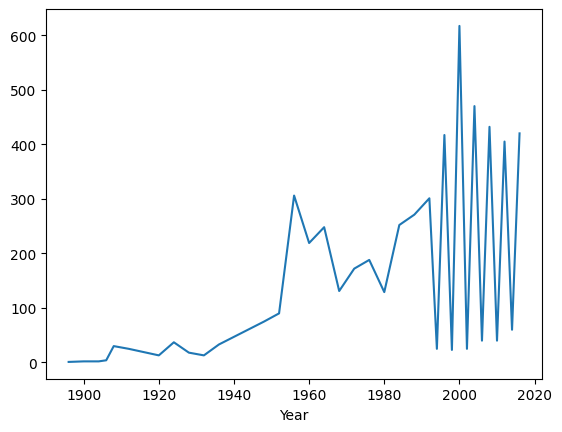

In [42]:
participation_historical_aus.plot.line("Year", "ID")

df_aus_partition = participation_historical_aus.reset_index() #.reset_index Gör om year från index till kolumn.
df_aus_partition.columns = ["Year", "ID"]

fig = px.line(
    df_aus_partition,
    x= "Year", 
    y= "ID",
    title= "Australia participation 1896–2016"
)

fig.show()

#Note to self! Om plotly.express kråglar i import cellen: import i första plotly-cell jag använder kör och gå tillbaka och kör import cell. 
#Efter det kan jag ta bort import mit i notebook och det funkar. Varför?


sommar OS:

In [43]:
aus_hist_part_summer = australia_summer.groupby("Year")["ID"].nunique() #year blir index






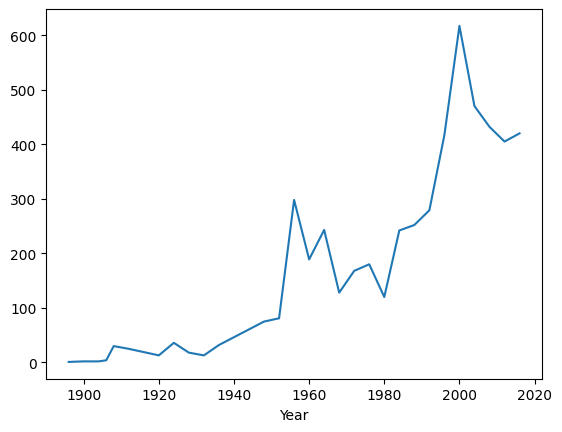

In [44]:
aus_hist_part_summer.plot.line("Year", "ID")

df_aus_partition_summer = aus_hist_part_summer.reset_index()

df_aus_partition_summer.columns = ["Year", "ID"]

fig = px.line(
    df_aus_partition_summer,
    x = "Year",
    y = "ID",
    title = "Summer Olympics Participation"
)

fig.show()

sammanfattning sommar os:
1956 - os i melbourne - peak i deltagande. nästa os färre. samma mönster i samband med os i sydney 2000.

1984 - vinst i american cup, nationalsång och färger valdes. första direktflyget mellan australien-usa. 

Vinter OS:


In [45]:
aus_hist_part_winter = australia_winter.groupby("Year")["ID"].nunique()

df_aus_partition_winter = aus_hist_part_winter.reset_index()
df_aus_partition_winter.columns = ["Year", "ID"]

fig = px.line(
    df_aus_partition_winter,
    x = "Year",
    y = "ID",
    title = "Winter Olympics Participation"
)

fig.show()

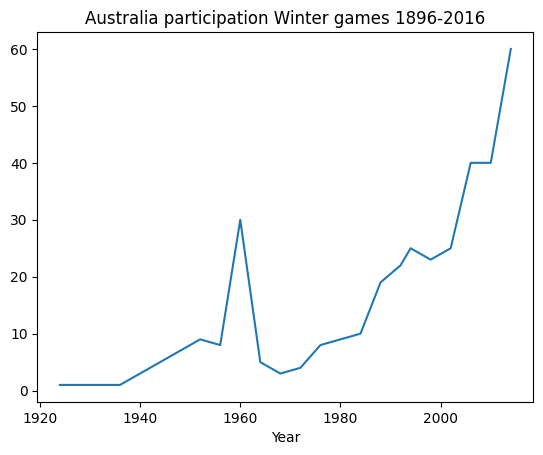

In [46]:
aus_hist_part_winter.plot.line("Year", "ID")

plt.title("Australia participation Winter games 1896-2016")
plt.show()

1960:
Australia sent a much larger team to the 1960 Olympics, thanks to the presence of the only ice hockey team Australia has ever fielded. In total, 31 athletes attended the Games. This included Hal Nerdal, the only Australian ever to compete in the Nordic combined discipline. He finished 31st in the dual cross country skiing and ski jumping event.

Speed skater Colin Hickey represented Australia for the third time at an Olympic Winter Games. The "rink rat" from Melbourne finished 13th and 14th over the 500 metres and 1500 metres respectively. (https://www.olympics.com.au/games/squaw-valley-1960/)

efterkrigstid och satsningar på idrott.

1992 och 1994 - Sommar och vinter OS inte längre samma år. därför kortare mellanrum.

efter 2002 (guld i skridsko) ökade deltagandet kraftigt i jmf med tidigare.

1984 - 10 deltagare. nästa os 1988 19 deltagare (varav 5 i BOB).  Även omdebbatterat firande av det som räknades somm 200 års dagen av Britternas ankomst. protester pågick.



## Equestrian sports:

Vad ska jag sortera på?

In [47]:

australia_sports = australia["Sport"].unique()

australia_sports



array(['Athletics', 'Diving', 'Boxing', 'Swimming', 'Rugby', 'Rowing',
       'Shooting', 'Tennis', 'Hockey', 'Wrestling', 'Ice Hockey',
       'Fencing', 'Archery', 'Football', 'Basketball', 'Cycling',
       'Volleyball', 'Sailing', 'Snowboarding', 'Cross Country Skiing',
       'Gymnastics', 'Softball', 'Biathlon', 'Alpine Skiing',
       'Synchronized Swimming', 'Equestrianism', 'Baseball', 'Canoeing',
       'Judo', 'Water Polo', 'Beach Volleyball', 'Triathlon', 'Handball',
       'Badminton', 'Weightlifting', 'Bobsleigh', 'Modern Pentathlon',
       'Taekwondo', 'Rugby Sevens', 'Freestyle Skiing', 'Table Tennis',
       'Rhythmic Gymnastics', 'Short Track Speed Skating',
       'Figure Skating', 'Skeleton', 'Luge', 'Speed Skating',
       'Trampolining', 'Alpinism', 'Golf', 'Nordic Combined',
       'Art Competitions'], dtype=object)

'Equestrianism'
aus_hist_part_winter = australia_winter.groupby("Year")["ID"].nunique()


In [48]:
aus_equestrian = australia[australia["Sport"] == "Equestrianism"]

aus_equestrian

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
5178,3462.0,"Timothy ""Tim"" Amitrano",M,25.0,171.0,70.0,Australia,AUS,2004 Summer,2004.0,Summer,Athina,Equestrianism,"Equestrianism Mixed Jumping, Individual",NaN,Australia,NaN
5294,6621.0,Kevin Ashley Bacon,M,32.0,167.0,66.0,Australia,AUS,1964 Summer,1964.0,Summer,Tokyo,Equestrianism,"Equestrianism Mixed Jumping, Individual",NaN,Australia,NaN
5295,6621.0,Kevin Ashley Bacon,M,32.0,167.0,66.0,Australia,AUS,1964 Summer,1964.0,Summer,Tokyo,Equestrianism,"Equestrianism Mixed Jumping, Team",NaN,Australia,NaN
5296,6621.0,Kevin Ashley Bacon,M,36.0,167.0,66.0,Australia,AUS,1968 Summer,1968.0,Summer,Mexico City,Equestrianism,"Equestrianism Mixed Jumping, Individual",NaN,Australia,NaN
5297,6621.0,Kevin Ashley Bacon,M,36.0,167.0,66.0,Australia,AUS,1968 Summer,1968.0,Summer,Mexico City,Equestrianism,"Equestrianism Mixed Jumping, Team",NaN,Australia,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12472,130641.0,"Matthew ""Matt"" Williams",M,23.0,178.0,72.0,Australia,AUS,2008 Summer,2008.0,Summer,Beijing,Equestrianism,"Equestrianism Mixed Jumping, Team",NaN,Australia,NaN
12473,130641.0,"Matthew ""Matt"" Williams",M,27.0,178.0,72.0,Australia,AUS,2012 Summer,2012.0,Summer,London,Equestrianism,"Equestrianism Mixed Jumping, Individual",NaN,Australia,NaN
12474,130641.0,"Matthew ""Matt"" Williams",M,27.0,178.0,72.0,Australia,AUS,2012 Summer,2012.0,Summer,London,Equestrianism,"Equestrianism Mixed Jumping, Team",NaN,Australia,NaN
12475,130641.0,"Matthew ""Matt"" Williams",M,31.0,178.0,72.0,Australia,AUS,2016 Summer,2016.0,Summer,Rio de Janeiro,Equestrianism,"Equestrianism Mixed Jumping, Individual",NaN,Australia,NaN


Glömde att det skulle vara på sport inte land/sport.

Kontrollera om ngon av undantagen i NOC behöver tas hänsyn till i fortsättningen:

In [49]:


missing_region = merged[merged["region"].isna()]["NOC"].unique()

missing_region


array(['ROT', 'SGP', 'TUV', 'UNK'], dtype=object)

Rot - Refugee Olympic team
SGP - samma som SIN = Singapore
TUV - Tuvalu
UNK - unknown



sortera ut sport kolumnen:


In [50]:


merged_sport = merged["Sport"].unique()

merged_sport

array(['Hockey', 'Football', 'Wrestling', 'Athletics', 'Taekwondo',
       'Judo', 'Boxing', 'Weightlifting', 'Shooting', 'Fencing',
       'Swimming', 'Sailing', 'Luge', 'Bobsleigh',
       'Synchronized Swimming', 'Triathlon', 'Equestrianism',
       'Alpine Skiing', 'Cycling', 'Volleyball', 'Handball', 'Rowing',
       'Cross Country Skiing', 'Table Tennis', 'Tennis', 'Gymnastics',
       'Trampolining', 'Badminton', 'Canoeing', 'Snowboarding',
       'Biathlon', 'Beach Volleyball', 'Basketball', 'Diving', 'Rugby',
       'Rugby Sevens', 'Polo', 'Modern Pentathlon', 'Archery',
       'Water Polo', 'Freestyle Skiing', 'Art Competitions', 'Skeleton',
       'Golf', 'Figure Skating', 'Ice Hockey', 'Softball', 'Baseball',
       'Rhythmic Gymnastics', 'Short Track Speed Skating',
       'Speed Skating', 'Alpinism', 'Nordic Combined', 'Tug-Of-War',
       'Ski Jumping', 'Curling', 'Lacrosse', 'Basque Pelota',
       'Military Ski Patrol', 'Cricket', 'Croquet', 'Motorboating',
       'Rac

Equestrianism

In [51]:
sport_equestrianism = merged[merged["Sport"] == "Equestrianism"]


sport_equestrianism

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
195,115198.0,"Eduard Peter Nicolaas ""Eddy"" Stibbe",M,51.0,185.0,87.0,Netherlands Antilles,AHO,2000 Summer,2000.0,Summer,Sydney,Equestrianism,"Equestrianism Mixed Three-Day Event, Individual",NaN,Curacao,Netherlands Antilles
196,115198.0,"Eduard Peter Nicolaas ""Eddy"" Stibbe",M,55.0,185.0,87.0,Netherlands Antilles,AHO,2004 Summer,2004.0,Summer,Athina,Equestrianism,"Equestrianism Mixed Three-Day Event, Individual",NaN,Curacao,Netherlands Antilles
1492,713.0,Jos Eugenio Acosta,M,26.0,173.0,73.0,Argentina,ARG,1968 Summer,1968.0,Summer,Mexico City,Equestrianism,"Equestrianism Mixed Three-Day Event, Individual",NaN,Argentina,NaN
1493,713.0,Jos Eugenio Acosta,M,26.0,173.0,73.0,Argentina,ARG,1968 Summer,1968.0,Summer,Mexico City,Equestrianism,"Equestrianism Mixed Three-Day Event, Team",NaN,Argentina,NaN
1494,713.0,Jos Eugenio Acosta,M,30.0,173.0,73.0,Argentina,ARG,1972 Summer,1972.0,Summer,Munich,Equestrianism,"Equestrianism Mixed Three-Day Event, Individual",NaN,Argentina,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269410,76870.0,Duan Mavec,M,36.0,169.0,74.0,Yugoslavia,YUG,1984 Summer,1984.0,Summer,Los Angeles,Equestrianism,"Equestrianism Mixed Dressage, Team",NaN,Serbia,Yugoslavia
269513,80785.0,Stojan Moderc,M,35.0,175.0,74.0,Yugoslavia,YUG,1984 Summer,1984.0,Summer,Los Angeles,Equestrianism,"Equestrianism Mixed Dressage, Individual",NaN,Serbia,Yugoslavia
269514,80785.0,Stojan Moderc,M,35.0,175.0,74.0,Yugoslavia,YUG,1984 Summer,1984.0,Summer,Los Angeles,Equestrianism,"Equestrianism Mixed Dressage, Team",NaN,Serbia,Yugoslavia
270093,108967.0,Vladimir Seunig,M,36.0,NaN,NaN,Yugoslavia,YUG,1924 Summer,1924.0,Summer,Paris,Equestrianism,"Equestrianism Men's Dressage, Individual",NaN,Serbia,Yugoslavia


Kolla om någon av NOC utan region finns med i ridsporten:

In [52]:
sport_equestrianism[sport_equestrianism["NOC"].isin(missing_region)]["NOC"].unique()


array([], dtype=object)

medaljer

In [3]:
sport_equestrianism["Medal"].value_counts()

NameError: name 'sport_equestrianism' is not defined

In [2]:
sport_equestrianism[sport_equestrianism["Medal"] == "Gold"]

NameError: name 'sport_equestrianism' is not defined

top 10 gulmedaljer:
gör en aggregation - hur många guld varje land fått

In [55]:
sport_equestrianism_gold = sport_equestrianism[sport_equestrianism["Medal"] == "Gold"]
df_equestrian_gold = sport_equestrianism_gold["NOC"].value_counts().reset_index()    #en series (indexrad + 1 kolumn)
                                                                                   # .reset_index() gör om till DF inför plot
df_equestrian_gold = df_equestrian_gold.rename(columns={"count": "Gold"})        #byt ut count mot Gold

df_equestrian_gold

,NOC,Gold
0,GER,77
1,SWE,37
2,FRA,32
3,USA,30
4,FRG,29
5,GBR,26
6,AUS,18
7,NED,18
8,URS,16
9,ITA,10


Lägg till "Region" för tydlighet.
Skapa uppslagsbok för NOC och Region

In [56]:
noc_region = merged[["NOC", "region"]].drop_duplicates().reset_index()  #


Gör om till DataFrame:


In [57]:
df_equestrian_noc_region_gold = df_equestrian_gold.merge(noc_region, on="NOC", how="left")

df_equestrian_noc_region_gold


,NOC,Gold,index,region
0,GER,77,107244,Germany
1,SWE,37,220549,Sweden
2,FRA,32,75778,France
3,USA,30,247406,USA
4,FRG,29,88536,Germany
5,GBR,26,91996,UK
6,AUS,18,5078,Australia
7,NED,18,172320,Netherlands
8,URS,16,241145,Russia
9,ITA,10,134813,Italy


In [58]:
gold_equestrianism_top10 = df_equestrian_noc_region_gold.sort_values(by="Gold", ascending=False).head(10)  # top 10 med störst först.

fig = px.bar(gold_equestrianism_top10,
            x="NOC",
            y="Gold", 
            title='Equestrianism - Countries top 10 gold medals',
            labels={'Gold':'Gold Medals'},
            color='region',
            category_orders={"NOC": gold_equestrianism_top10["NOC"].tolist()}    #Följer inte ordning från ascending=False
            )                                                                    #bad chatGPT om hjälp


fig.show()

HUr Har ridsporten förändrats över tid? Vilka länder i top 10?


In [59]:
gold_year_noc = (sport_equestrianism_gold.groupby(["Year", "NOC"], as_index=False).size().rename(columns={"size": "Gold"})
)
#.groupby(["Year", "NOC"] -> grupperar guldmedaljer och noc - as_index=False -> behåller i kolumner 

sorted_historical_equestrianism = gold_year_noc.sort_values(["Year", "Gold"], ascending=[True, False])

top10_historical_equestrianism = sorted_historical_equestrianism.groupby("Year").head(10)
top10_historical_equestrianism

,Year,NOC,Gold
0,1900.0,BEL,3
1,1900.0,FRA,2
2,1900.0,ITA,1
4,1912.0,SWE,10
3,1912.0,FRA,1
...,...,...,...
83,2012.0,GER,6
84,2012.0,SUI,1
85,2016.0,FRA,8
87,2016.0,GER,5


Barplot

In [60]:
top10_historical_equestrianism["Year"].value_counts().sort_index()


Year
1900.0    3
1912.0    2
1920.0    3
1924.0    3
1928.0    4
1932.0    4
1936.0    1
1948.0    4
1952.0    3
1956.0    3
1960.0    4
1964.0    4
1968.0    6
1972.0    4
1976.0    4
1980.0    4
1984.0    3
1988.0    3
1992.0    3
1996.0    3
2000.0    4
2004.0    6
2008.0    4
2012.0    3
2016.0    3
Name: count, dtype: int64

In [61]:
fig = px.bar(
    top10_historical_equestrianism,
    x="NOC",
    y="Gold",
    color="NOC",  # eller "NOC" om du hellre vill det
    animation_frame="Year",   # gör så du kan "bläddra" år för år
    title="Equestrianism – Top 10 guldmedalj-länder per år",
    labels={"Gold": "Guldmedalljer", "NOC": "Land (NOC)"}
)

fig.show()

Funkar inte. För få Guldmedaljer. Gör med medaljer istället!

In [1]:
sport_equestrianism_medals = sport_equestrianism[sport_equestrianism["Medal"].notna()]
medals_per_year = sport_equestrianism_medals.groupby(["Year", "NOC"]).size()  #count per keyS instead of value_count() - per key


sorted_per_year = medals_per_year.sort_values(ascending=False)
df_sorted_per_year = sorted_per_year.reset_index() 
df_sorted_per_year["Year"] = df_sorted_per_year["Year"].astype(int)
df_sorted_per_year = df_sorted_per_year.rename(columns={0: "Medals"}) 
top10_per_year_equestrianism = df_sorted_per_year.groupby("Year").head(10)

medals_sorted_per_year = (sport_equestrianism_medals.groupby(["Year", "NOC", "Medal"])
                          .size()
                          .reset_index(name="Count"))
medals_sorted_per_year




NameError: name 'sport_equestrianism' is not defined

In [63]:
medals_all_years = medals_sorted_per_year.pivot_table(
    values="Count",
    index=["Year", "NOC"],
    columns="Medal",
    fill_value=0
).reset_index()

medals_all_years.columns.name = None



medals_all_years["Total"] = (
    medals_all_years["Gold"]
    + medals_all_years["Silver"]
    + medals_all_years["Bronze"]
    )

medals_all_years["Year"] = medals_all_years["Year"].astype(int)

medals_all_sorted = medals_all_years.sort_values(
    ["Year", "Total"],
    ascending=[True, False]
)

medals_all_sorted

top10_per_year = medals_all_sorted.groupby("Year").head(10)

top10_per_year





,Year,NOC,Bronze,Gold,Silver,Total
1,1900,FRA,4.0,2.0,2.0,8.0
0,1900,BEL,1.0,3.0,1.0,5.0
2,1900,ITA,0.0,1.0,1.0,2.0
6,1912,SWE,1.0,10.0,1.0,12.0
5,1912,GER,4.0,0.0,6.0,10.0
...,...,...,...,...,...,...
183,2016,USA,5.0,0.0,4.0,9.0
180,2016,GBR,0.0,2.0,4.0,6.0
177,2016,AUS,4.0,0.0,0.0,4.0
178,2016,CAN,1.0,0.0,0.0,1.0


In [64]:
top10_per_year = medals_all_sorted.groupby("Year").head(10)

print(top10_per_year.groupby("Year").size())






Year
1900     3
1912     5
1920     4
1924     9
1928     9
1932     5
1936    10
1948     8
1952     8
1956     7
1960     8
1964     8
1968     8
1972     6
1976     7
1980     7
1984     7
1988     7
1992     7
1996     8
2000     9
2004     8
2008     9
2012     8
2016     7
dtype: int64


plot:

In [65]:
fig = px.bar(
    top10_per_year,
    x= "NOC",
    y=["Gold","Silver", "Bronze"],
    color_discrete_map={                       
        "Gold":"gold",
           "Silver":"silver",
           "Bronze":"#CD7F32"
           },
    animation_frame="Year",
    title="TOP 10 Olympic Equestranism countries/year",
    labels={"value": "Medals total", "NOC":"Region", "variable":"Medals sort"},
    barmode="stack"
)
# kod nedan utvecklad med hjälp av Claude (Anthropic, 2025). Konversation: 16 november 2025:
#frågan var hur jag kunde få tydligare graf.

fig.update_layout(                               
    xaxis_tickangle=-45,                         #vrider NOC text så den är lättare att läsa
    height=600,                                  # höjd på  grafen
    xaxis={'categoryorder': 'total descending'}  # Sorterar inom staplarna inom varje år från mest till minst
)
fig.show()

ATT göra: RENSA! STÄDA GÖRA SNYGGT!

fig = px.bar(
    top10_per_year,
    x= "NOC",
    y=["Gold","Silver", "Bronze"],
    color_discrete_map={                       
        "Gold":"gold",
           "Silver":"silver",
           "Bronze":"#CD7F32"
           },
    animation_frame="Year",
    title="TOP 10 Olympic Equestranism countries/year",
    labels={"value": "Medals total", "NOC":"Region", "variable":"Medals sort"},
    barmode="stack"
)
# kod nedan utvecklad med hjälp av Claude (Anthropic, 2025). Konversation: 16 november 2025:
#frågan var hur jag kunde få tydligare graf.

fig.update_layout(                               
    xaxis_tickangle=-45,                         #vrider NOC text så den är lättare att läsa
    height=600,                                  # höjd på  grafen
    xaxis={'categoryorder': 'total descending'}  # Sorterar inom staplarna inom varje år från mest till minst
)
fig.show()

